#### Os dados, até a data do presente estudo, estão no https://opendatasus.saude.gov.br/dataset/bd-srag-2020
#### O presente arquivo é de sábado, 6 de junho. Atenção: pelo histório, existe uma inserção grande de registros nas segundas
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\INFLUD-06-06-2020.csv'
df = pd.read_csv(filename, delimiter=';', 
                 error_bad_lines=False)

b'Skipping line 100039: expected 143 fields, saw 144\n'
b'Skipping line 121557: expected 143 fields, saw 145\n'
b'Skipping line 157743: expected 143 fields, saw 144\n'
b'Skipping line 217590: expected 143 fields, saw 144\n'
b'Skipping line 232938: expected 143 fields, saw 145\n'
c:\users\fmasa\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (0,2,60,62,63,64,109,111,127) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(245602, 143)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245602 entries, 0 to 245601
Columns: 143 entries, #NU_NOTIFIC to PAC_DSCBO
dtypes: float64(89), object(54)
memory usage: 217.4+ MB


In [5]:
df.columns

Index(['#NU_NOTIFIC', 'DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI',
       'SG_UF_NOT', 'ID_REGIONA', 'CO_REGIONA', 'ID_MUNICIP', 'CO_MUN_NOT',
       ...
       'DT_DIGITA', 'HISTO_VGM', 'PAIS_VGM', 'CO_PS_VGM', 'LO_PS_VGM',
       'DT_VGM', 'DT_RT_VGM', 'PCR_SARS2', 'PAC_COCBO', 'PAC_DSCBO'],
      dtype='object', length=143)

In [6]:
# Tabelas de microdados usam números, faço a correspondência desses números com seus significados
troca_raça = {1:'Branca', 2:'Preta', 3:'Amarela',
              4:'Parda', 5:'Indígena', 9:'Ignorado'}
troca_escolaridade = {0:'Sem', 1:'Fund1', 
                      2:'Fund2', 3:'Médio',
                      4:'Superior', 
                      5:'Não se aplica',
                      9:'Ignorado'}

In [7]:
df.loc[(df.CS_RACA.isnull()), 'CS_RACA'] = 9
df['CS_RACA'] = df['CS_RACA'].apply(lambda x: troca_raça[x])
df.loc[(df.CS_ESCOL_N.isnull()), 'CS_ESCOL_N'] = 9
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].apply(lambda x: troca_escolaridade[x])
df.SEM_NOT = df.SEM_NOT.apply(pd.to_numeric, errors='coerce')
df['#NU_NOTIFIC'].dropna()

0         315789332126
1         315814412112
2         315801461081
3         315821088325
4         315816936495
              ...     
245597    315912824033
245598    315912854827
245599    315913867184
245600    315913690623
245601    315912902454
Name: #NU_NOTIFIC, Length: 245602, dtype: object

In [8]:
df.sample(10)

,#NU_NOTIFIC,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,...,CO_LAB_IF,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,LAB_PCR,CO_LAB_PCR,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,OBSERVA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO
149779,315894031150,19/03/2020 00:00:00,12.0,11/03/2020 00:00:00,11.0,SP,GVE X OSASCO,1335.0,ITAPECERICA DA SERRA,352220.0,HOSPITAL GERAL DE ITAPECERICA DA SERRA,2792176.0,F,15/03/1957 00:00:00,62.0,3.0,3062.0,5.0,Parda,NaN,Fund1,BRASIL,1.0,SP,GVE X OSASCO,1335.0,ITAPECERICA DA SERRA,352220.0,NaN,9.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,NaN,2.0,13/04/2020 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INSTITUTO ADOLFO LUTZ SAO PAULO,2091364.0,4.0,NaN,1.0,1.0,20/03/2020 00:00:00,13/05/2020 00:00:00,TC DE TORAX NAO SUGESTIVO DE COVID.,13/05/2020 00:00:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94789,315856613807,30/03/2020 00:00:00,14.0,21/03/2020 00:00:00,12.0,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740.0,INSTITUTO COUTO MAIA,5428.0,F,22/01/1950 00:00:00,70.0,3.0,3070.0,5.0,Ignorado,NaN,Ignorado,BRASIL,1.0,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,LAURO DE FREITAS,291920.0,1.0,2.0,NaN,2.0,1.0,1.0,2.0,NaN,1.0,1.0,2.0,2.0,...,NaN,1.0,01/05/2020 00:00:00,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,9.0,NaN,08/05/2020 00:00:00,NAO DETECTAVEL PARA COVID -19 PACIENTE TRANSFE...,31/03/2020 00:00:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214793,315898136757,13/03/2020 00:00:00,11.0,12/03/2020 00:00:00,11.0,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,HOSPITAL SANTA PAULA,2089580.0,F,15/06/1960 00:00:00,59.0,3.0,3059.0,5.0,Branca,NaN,Superior,BRASIL,1.0,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,...,NaN,2.0,15/03/2020 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DELBONI AURIEMO,3488217.0,4.0,NaN,1.0,1.0,24/03/2020 00:00:00,18/05/2020 00:00:00,PACIENTE VEIO A OBITO NO DIA 23/04/2020 POR UM...,18/05/2020 00:00:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2786,315889676853,08/05/2020 00:00:00,19.0,08/05/2020 00:00:00,19.0,SP,GVE XVII CAMPINAS,1342.0,CAMPINAS,350950.0,CAISM CENTRO DE ATENCAO INTEGRAL DE SAUDE DA M...,2082152.0,F,21/09/1990 00:00:00,29.0,3.0,3029.0,5.0,Branca,NaN,Superior,BRASIL,1.0,SP,GVE XVII CAMPINAS,1342.0,SANTA BARBARA D'OESTE,354580.0,1.0,2.0,2.0,9.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,2.0,11/05/2020 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAISM CENTRO DE ATENCAO INTEGRAL DE SAUDE DA M...,2082152.0,4.0,NaN,1.0,2.0,08/05/2020 00:00:00,14/05/2020 00:00:00,OBITO NO PA DO CAISM,08/05/2020 00:00:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47679,315898918373,17/05/2020 00:00:00,21.0,16/05/2020 00:00:00,20.0,SP,GVE XVII CAMPINAS,1342.0,CAMPINAS,350950.0,REAL SOCIEDADE PORTUGUESA DE BENEFICENCIA,2078465.0,M,08/09/1933 00:00:00,86.0,3.0,3086.0,6.0,Branca,NaN,Ignorado,BRASIL,1.0,SP,GVE XVII CAMPINAS,1342.0,CAMPINAS,350950.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,...,NaN,2.0,20/05/2020 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LABORATORIO DE PATOLOGIA CIRURGICA DE SAO PAULO,3793516.0,4.0,NaN,1.0,2.0,25/05/2020 00:00:00,26/05/2020 00:00:00,NaN,19/05/2020 00:00:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44947,315894813200,30/04/2020 00:00:00,18.0,26/04/2020 00:00:00,18.0,RJ,NaN,NaN,NITEROI,330330.0,HOSPITAL ICARAI,6

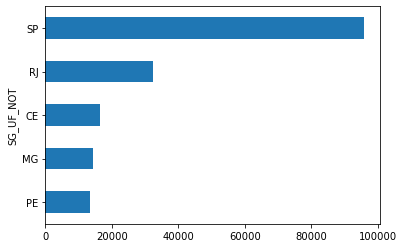

In [9]:
df.groupby('SG_UF_NOT').size().sort_values().tail(5).plot(kind='barh')

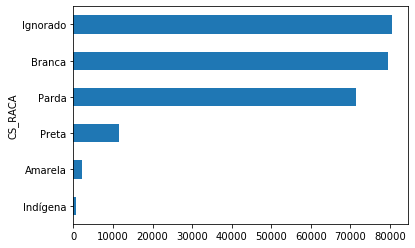

In [10]:
df.groupby('CS_RACA').size().sort_values().plot(kind='barh')

In [11]:
df.groupby('CS_RACA').size().sort_values()

CS_RACA
Indígena      552
Amarela      2126
Preta       11498
Parda       71450
Branca      79428
Ignorado    80548
dtype: int64

In [12]:
df.groupby('CS_ESCOL_N').size().sort_values(ascending=False)

CS_ESCOL_N
Ignorado         154482
Médio             25246
Fund1             21494
Fund2             14112
Superior          13342
Não se aplica     10444
Sem                6482
dtype: int64

In [13]:
df.query('HISTO_VGM == 1')['HISTO_VGM'].value_counts()

1.0    943
Name: HISTO_VGM, dtype: int64

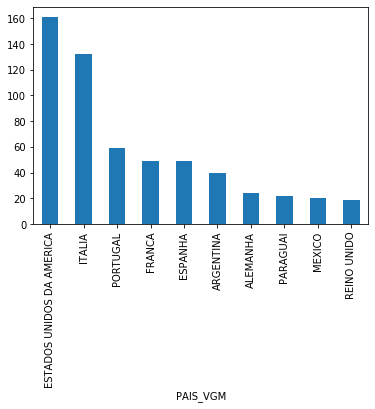

In [14]:
df.query('HISTO_VGM == 1 and PAIS_VGM != "BRASIL"').groupby('PAIS_VGM').size().sort_values(ascending=False).head(10).plot(kind='bar')


In [15]:
df.query('CARDIOPATI == 1')['CARDIOPATI'].value_counts()

1.0    71018
Name: CARDIOPATI, dtype: int64

In [16]:
df.query('DIABETES == 1')['DIABETES'].value_counts()

1.0    50571
Name: DIABETES, dtype: int64

In [17]:
df.query('OBESIDADE == 1')['OBESIDADE'].value_counts()

1.0    6519
Name: OBESIDADE, dtype: int64

In [18]:
df.query('NU_IDADE_N >= 60')['NU_IDADE_N'].count()

113549

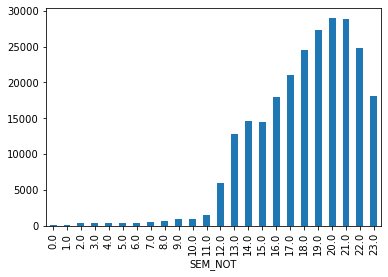

In [19]:
df.groupby('SEM_NOT').size().plot(kind='bar')

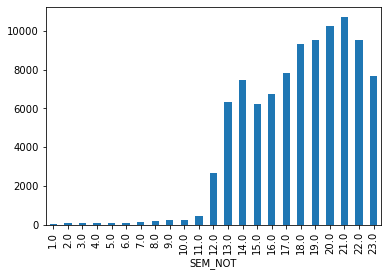

In [20]:
df.query('SG_UF_NOT == "SP"').groupby('SEM_NOT').size().plot(kind='bar')

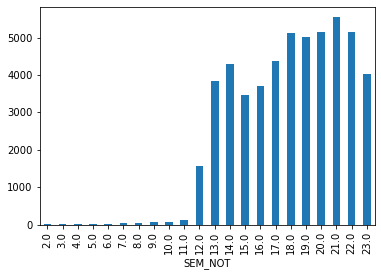

In [21]:
df.query('ID_MUNICIP == "SAO PAULO"').groupby('SEM_NOT').size().plot(kind='bar')